In [344]:
##############################################################################
#####################################################################
#####################################################################
#
# STEP 2 - CORRELATIONS: 
#
#               correlations all columns ⇔ sold-houses prices
#
#####################################################################
##############################################################################

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import arange
import math

import seaborn as sns
sns.set_style("white")

import scipy as sp
from scipy import linalg, optimize

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import collections
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.dates import DateFormatter

import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp



In [3]:
# import clean data (cleaned in step 1)
df = pd.read_csv("../data/cleandata.csv")
# confirm
df.head(1)

wdf = df.copy()

In [22]:
# correlations:

    # new df for correlation-vals:
correlations = pd.DataFrame(wdf.corr())
correlations = correlations.reset_index().rename(columns={'index':'col', 'price':'price_corr'})
price_corr_df = correlations.get(['col','price_corr']).sort_values('col')
  # add col with abs vals of corr:
price_corr_df['abs_price_corr'] = np.abs(price_corr_df['price_corr'])
    # confirm:  
price_corr_df = price_corr_df.sort_values('abs_price_corr')
price_corr_df.head()

,col,price_corr,abs_price_corr
22,LowQualFinSF,-0.009992,0.009992
41,MiscVal,-0.016990,0.016990
7,Utilities,0.017079,0.017079
43,year,-0.020451,0.020451
25,BsmtHalfBath,-0.030175,0.030175


<AxesSubplot:xlabel='abs_price_corr', ylabel='col'>

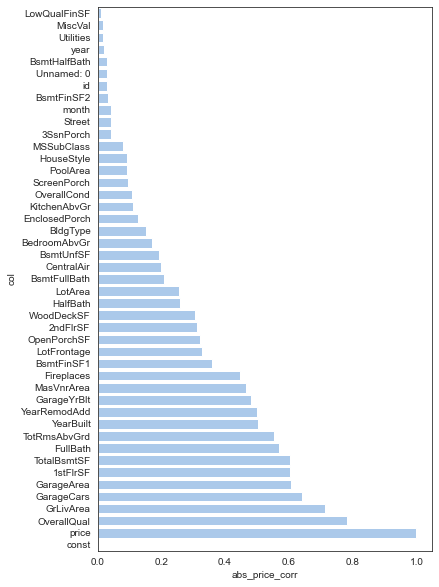

In [25]:
    # plot df_correlations
f, ax = plt.subplots(figsize=(6, 10))

sns.set_color_codes("pastel")

sns.barplot(x="abs_price_corr", y="col", data=price_corr_df,label="abs_price_corr", color="b")

In [87]:
###############################################################################
#### NOTES:
#
# boxplot shows cols with highest 'price' correlations:
#
#     - 1. RANK: 'OveralQual' 
#     - 2. RANK: 'GrLivArea'
#     - 3. RANK: 'GarageCars'
#     - 4. RANK: 'GarageArea'
#     - 5. RANK: 'TotalBsmtSF'
#
###############################################################################